# **Estimating Delivery Time for Porter** 


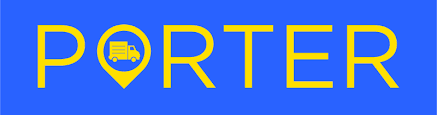   

# **Comoany Introduction**
Porter is an Indian logistics company that provides on-demand transportation services. It connects customers with drivers for quick and efficient goods delivery. This project analyzes Porter's dataset to uncover trends and insights in their operations.

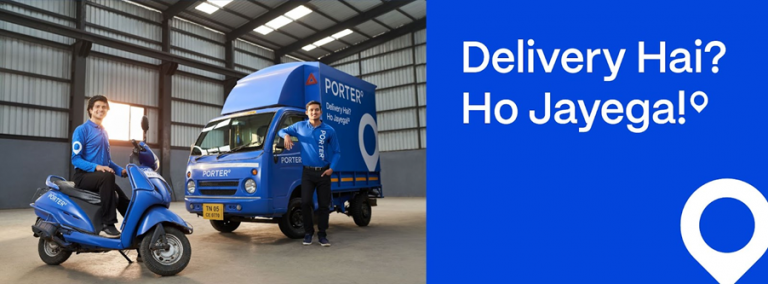 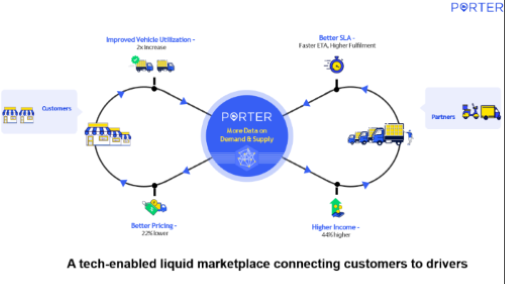

## **Project Intro**

The goal of this project is to predict delivery times for food orders based on various factors, including the items ordered and the restaurant location.

- Key tasks in this project include exploring the data to find patterns.
- Cleaning and processing the data to handle missing or incorrect information.
- By transforming relevant features, the data can be prepared for modeling by visualizing key trends and removing any outliers.

# **Dataset Description**

The dataset includes the following information for each order:
1. **market_id**: Integer ID for the market where the restaurant is located
2. **created_at**: Timestamp at which the order was placed
3. **actual_delivery_time**: Timestamp when the order was delivered
4. **store_primary_category**: Category of the restaurant
5. **order_protocol**: Integer code value for the order protocol (e.g., through Porter,call to
restaurant, pre-booked, third-party, etc.)
6. **total_items**: Total number of items in the order
7. **subtotal**: Final price of the order
8. **num_distinct_items**: Number of distinct items in the order
9. **min_item_price**: Price of the cheapest item in the order
10. **max_item_price**: Price of the most expensive item in the order
11. **total_onshift_partners**: Number of delivery partners on duty when the order was placed
12. **total_busy_partners**: Number of delivery partners attending to other tasks
13. **total_outstanding_orders**: Total number of orders to be fulfilled at that moment


# **Import Some Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Import CSV File into python**

In [2]:
porter= pd.read_csv(r'D:\Intership\dataset.csv')

## **--> Data Structure and Overview**


In [3]:
porter.head()

market_id       created_at actual_delivery_time  \
0        1.0   2/6/2015 22:24       2/6/2015 23:27   
1        2.0  2/10/2015 21:49      2/10/2015 22:56   
2        3.0  1/22/2015 20:39      1/22/2015 21:09   
3        3.0   2/3/2015 21:21       2/3/2015 22:13   
4        3.0   2/15/2015 2:40       2/15/2015 3:20   

                           store_id store_primary_category  order_protocol  \
0  df263d996281d984952c07998dc54358               american             1.0   
1  f0ade77b43923b38237db569b016ba25                mexican             2.0   
2  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
3  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
4  f0ade77b43923b38237db569b016ba25                    NaN             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            1      1900                   1            1900            1900   
3            6      6900                   5             600            1800   
4            3      3900                   3            1100            1600   

   total_onshift_partners  total_busy_partners  total_outstanding_orders  
0                    33.0                 14.0                      21.0  
1                     1.0                  2.0                       2.0  
2                     1.0                  0.0                       0.0  
3                     1.0                  1.0                       2.0  
4                     6.0                  6.0                       9.0

In [4]:
porter.shape

(197428, 14)

In [5]:
porter.dtypes

market_id                   float64
created_at                   object
actual_delivery_time         object
store_id                     object
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
dtype: object

## **--> Descriptive Statistics**


In [6]:
porter.describe()

market_id  order_protocol    total_items       subtotal  \
count  196441.000000   196433.000000  197428.000000  197428.000000   
mean        2.978706        2.882352       3.196391    2682.331402   
std         1.524867        1.503771       2.666546    1823.093688   
min         1.000000        1.000000       1.000000       0.000000   
25%         2.000000        1.000000       2.000000    1400.000000   
50%         3.000000        3.000000       3.000000    2200.000000   
75%         4.000000        4.000000       4.000000    3395.000000   
max         6.000000        7.000000     411.000000   27100.000000   

       num_distinct_items  min_item_price  max_item_price  \
count       197428.000000   197428.000000   197428.000000   
mean             2.670791      686.218470     1159.588630   
std              1.630255      522.038648      558.411377   
min              1.000000      -86.000000        0.000000   
25%              1.000000      299.000000      800.000000   
50%              2.000000      595.000000     1095.000000   
75%              3.000000      949.000000     1395.000000   
max             20.000000    14700.000000    14700.000000   

       total_onshift_partners  total_busy_partners  total_outstanding_orders  
count           181166.000000        181166.000000             181166.000000  
mean                44.808093            41.739747                 58.050065  
std                 34.526783            32.145733                 52.661830  
min                 -4.000000            -5.000000                 -6.000000  
25%                 17.000000            15.000000                 17.000000  
50%                 37.000000            34.000000                 41.000000  
75%                 65.000000            62.000000                 85.000000  
max                171.000000           154.000000                285.000000

In [7]:
porter['store_primary_category'].value_counts()

store_primary_category
american             19399
pizza                17321
mexican              17099
burger               10958
sandwich             10060
                     ...  
lebanese                 9
indonesian               2
belgian                  2
chocolate                1
alcohol-plus-food        1
Name: count, Length: 74, dtype: int64


--> American Store category having max no of orders and "chocolate" ,"alcohol-plus-food"  are same minimum number of orders.

In [8]:
porter['order_protocol'].value_counts()

order_protocol
1.0    54725
3.0    53199
5.0    44290
2.0    24052
4.0    19354
6.0      794
7.0       19
Name: count, dtype: int64

--> 1 number of protocol are max noumber of order and 7 is minimum

In [9]:
# Distribution of categorical columns having prcentage of orders
print(porter['store_primary_category'].value_counts(normalize=True).round(2)*100)
print(porter['order_protocol'].value_counts(normalize=True).round(2)*100)

store_primary_category
american             10.0
pizza                 9.0
mexican               9.0
burger                6.0
sandwich              5.0
                     ... 
lebanese              0.0
indonesian            0.0
belgian               0.0
chocolate             0.0
alcohol-plus-food     0.0
Name: proportion, Length: 74, dtype: float64
order_protocol
1.0    28.0
3.0    27.0
5.0    23.0
2.0    12.0
4.0    10.0
6.0     0.0
7.0     0.0
Name: proportion, dtype: float64


## ***--> Missing Values Handling***

In [10]:
porter.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [11]:
porter['store_primary_category'].fillna(method='ffill',inplace=True)
porter['market_id'].fillna(method='ffill',inplace=True)
porter['order_protocol'].fillna(porter['order_protocol'].median(),inplace=True)

"""Analyzing this dataset, the'store_promary_category' and'market_id' columns have many missing values. I analyze them by comparing the stoere_id to the category and
        the market_id number is the same in this data set. Then, I fill in the missing values by combining farword filing mathod in those two columns."""

"Analyzing this dataset, the'store_promary_category' and'market_id' columns have many missing values. I analyze them by comparing the stoere_id to the category and\n        the market_id number is the same in this data set. Then, I fill in the missing values by combining farword filing mathod in those two columns."

In [12]:
porter.isna().sum()

market_id                       0
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category          0
order_protocol                  0
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

## **--> Data preprocessing and feature engineering**


In [13]:
# Fill the null values in the columns "total_onshift_partners," "total_busy_partners," and "total_outstanding_orders" with "0" 
# because if there are no onshift partners, busy partners, or outstanding orders, the values should be zero.

porter['total_onshift_partners'] = porter['total_onshift_partners'].fillna(0)
porter['total_busy_partners'] = porter['total_busy_partners'].fillna(0)
porter['total_outstanding_orders'] = porter['total_outstanding_orders'].fillna(0)

In [14]:
porter.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        7
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

In [15]:
# drop null values

porter.dropna(inplace=True)

In [16]:
porter.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

In [17]:
porter.shape

(197421, 14)

In [18]:
# Convert 'created_at', and  to datetime if not already done
porter['created_at'] = pd.to_datetime(porter['created_at'])
porter['actual_delivery_time'] = pd.to_datetime(porter['actual_delivery_time'])

In [19]:
# Extract day, week, and month 
porter['order_day'] = porter['created_at'].dt.date
porter['order_week'] = porter['created_at'].dt.isocalendar().week
porter['order_month'] = porter['created_at'].dt.to_period('M')

In [20]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197421 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 197421 non-null  float64       
 1   created_at                197421 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197421 non-null  object        
 4   store_primary_category    197421 non-null  object        
 5   order_protocol            197421 non-null  float64       
 6   total_items               197421 non-null  int64         
 7   subtotal                  197421 non-null  int64         
 8   num_distinct_items        197421 non-null  int64         
 9   min_item_price            197421 non-null  int64         
 10  max_item_price            197421 non-null  int64         
 11  total_onshift_partners    197421 non-null  float64       
 12  total_b

In [21]:
porter.groupby(porter['created_at'].dt.year).size()

created_at
2014         1
2015    197420
dtype: int64

--> In year 2014 have only 1 row its error in data.

In [22]:
# Drop row where year is 2014
print(porter.shape)
porter_n = porter[porter['created_at'].dt.year != 2014]

(197421, 17)


In [23]:
porter_n.shape

(197420, 17)

In [24]:
# number of orders by day
order_by_day=porter_n.groupby('order_day').size().reset_index().rename(columns={0:'num_of_orders'}).sort_values(by='num_of_orders',ascending=False)
order_by_day

order_day  num_of_orders
17  2015-02-07           9149
25  2015-02-15           9085
24  2015-02-14           9016
18  2015-02-08           8873
3   2015-01-24           8230
10  2015-01-31           8146
4   2015-01-25           7934
26  2015-02-16           7931
11  2015-02-01           7722
23  2015-02-13           7383
19  2015-02-09           7278
16  2015-02-06           7118
15  2015-02-05           6850
22  2015-02-12           6784
9   2015-01-30           6763
12  2015-02-02           6715
2   2015-01-23           6611
21  2015-02-11           6403
13  2015-02-03           6369
14  2015-02-04           6113
20  2015-02-10           6090
27  2015-02-17           6078
8   2015-01-29           6038
1   2015-01-22           6001
7   2015-01-28           5669
6   2015-01-27           5524
5   2015-01-26           5478
28  2015-02-18           3981
0   2015-01-21           2088

In [25]:
# number of orders by Week
order_by_week=porter_n.groupby('order_week').size().reset_index().rename(columns={0:'num_of_orders'}).sort_values(by='num_of_orders',ascending=False)
order_by_week

order_week  num_of_orders
3           7          52039
2           6          51187
1           5          45340
0           4          30864
4           8          17990

In [26]:
# number of orders by month
orders_by_month=porter_n.groupby('order_month').size().reset_index().rename(columns={0:'num_of_orders'}).sort_values(by='num_of_orders',ascending=False)
orders_by_month

order_month  num_of_orders
1     2015-02         128938
0     2015-01          68482

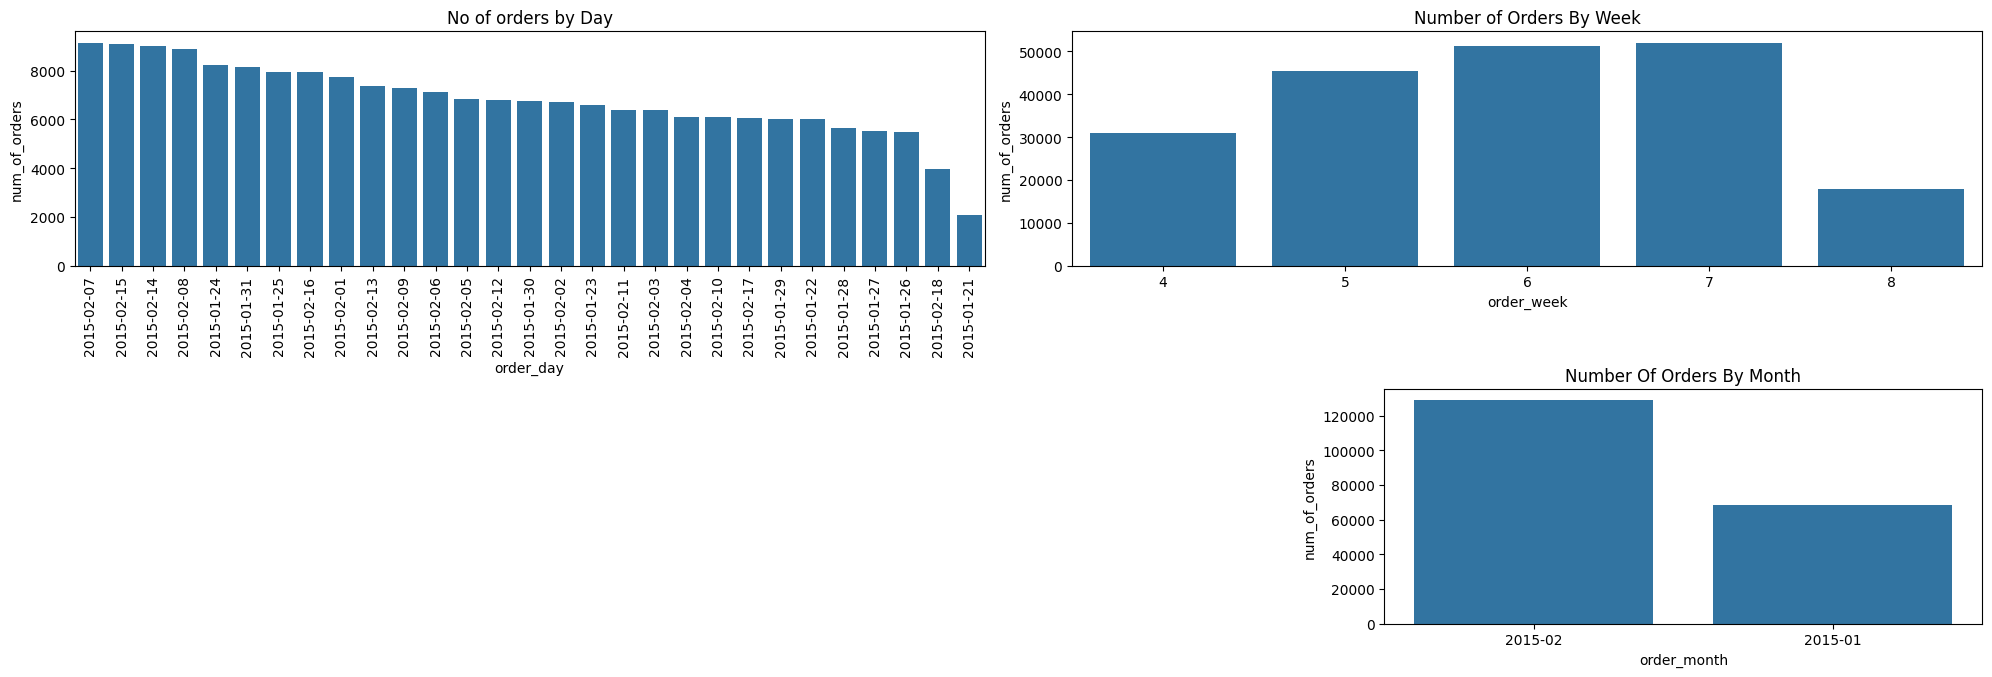

In [27]:
# Plotting orders by day, week, and month
plt.figure(figsize=(20, 10))

plt.subplot(3, 2, 1)
sns.barplot(data=order_by_day, x='order_day',y='num_of_orders')
plt.xticks(rotation=90)
plt.title('No of orders by Day')

plt.subplot(3, 2, 2)
sns.barplot(data=order_by_week, x='order_week',y='num_of_orders')
plt.title('Number of Orders By Week')
plt.tight_layout(pad=1.0)

plt.subplot(3,3,6)
sns.barplot(data=orders_by_month, x='order_month',y='num_of_orders')
plt.title('Number Of Orders By Month')
plt.show()

- ** In date  07-02-2015, 7 and 6 week, and 2 month have maximum number of orders.

In [28]:
porter_n.dtypes

market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_id                            object
store_primary_category              object
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_partners             float64
total_busy_partners                float64
total_outstanding_orders           float64
order_day                           object
order_week                          UInt32
order_month                      period[M]
dtype: object

In [29]:
# Create a new columns as delivery time in minutes 
porter_n['delivery_duration'] = (porter_n['actual_delivery_time'] - porter_n['created_at']).dt.total_seconds() / 60

In [30]:
porter_n['order_hour'] = porter_n['created_at'].dt.hour
porter_n['order_day_of_week'] = porter_n['created_at'].dt.day_name()
porter_n['order_year'] = porter_n['created_at'].dt.year

In [31]:
porter_n['order_hour']=porter_n['order_hour'].astype('str')

In [32]:
porter_n['delivery_duration'].describe()

count    197420.000000
mean         47.754655
std          26.888871
min           2.000000
25%          35.000000
50%          44.000000
75%          56.000000
max        6231.000000
Name: delivery_duration, dtype: float64

In [33]:
porter_n['market_id']=porter_n['market_id'].astype('str')
porter_n['order_protocol']=porter_n['order_protocol'].astype('str')
porter_n['order_year'] = porter_n['order_year'].astype('str')

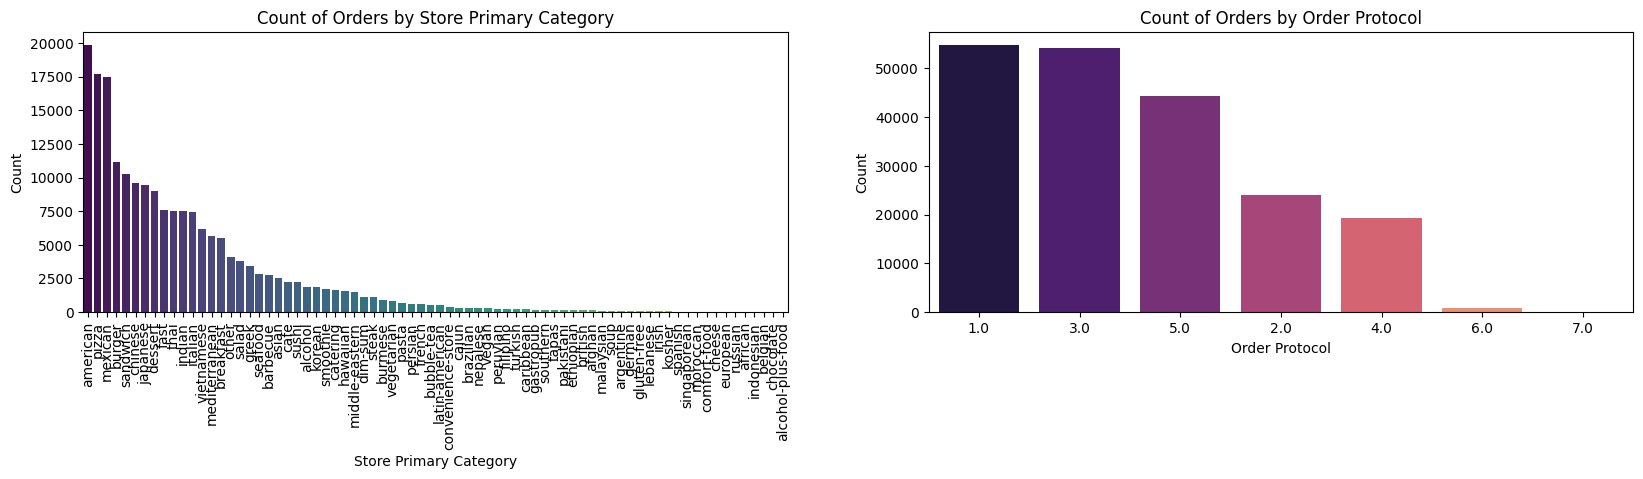

In [34]:
plt.figure(figsize=(20, 8))

plt.subplot(2,2,1)
sns.countplot(data=porter_n, x='store_primary_category', palette="viridis",order=porter_n['store_primary_category'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Count of Orders by Store Primary Category")
plt.xlabel("Store Primary Category")
plt.ylabel("Count")



plt.subplot(2,2,2)
sns.countplot(data=porter_n, x='order_protocol', palette="magma",order=porter_n['order_protocol'].value_counts().index)
plt.title("Count of Orders by Order Protocol")
plt.xlabel("Order Protocol")
plt.ylabel("Count")
plt.show()


## **--> Outlier Analysis**

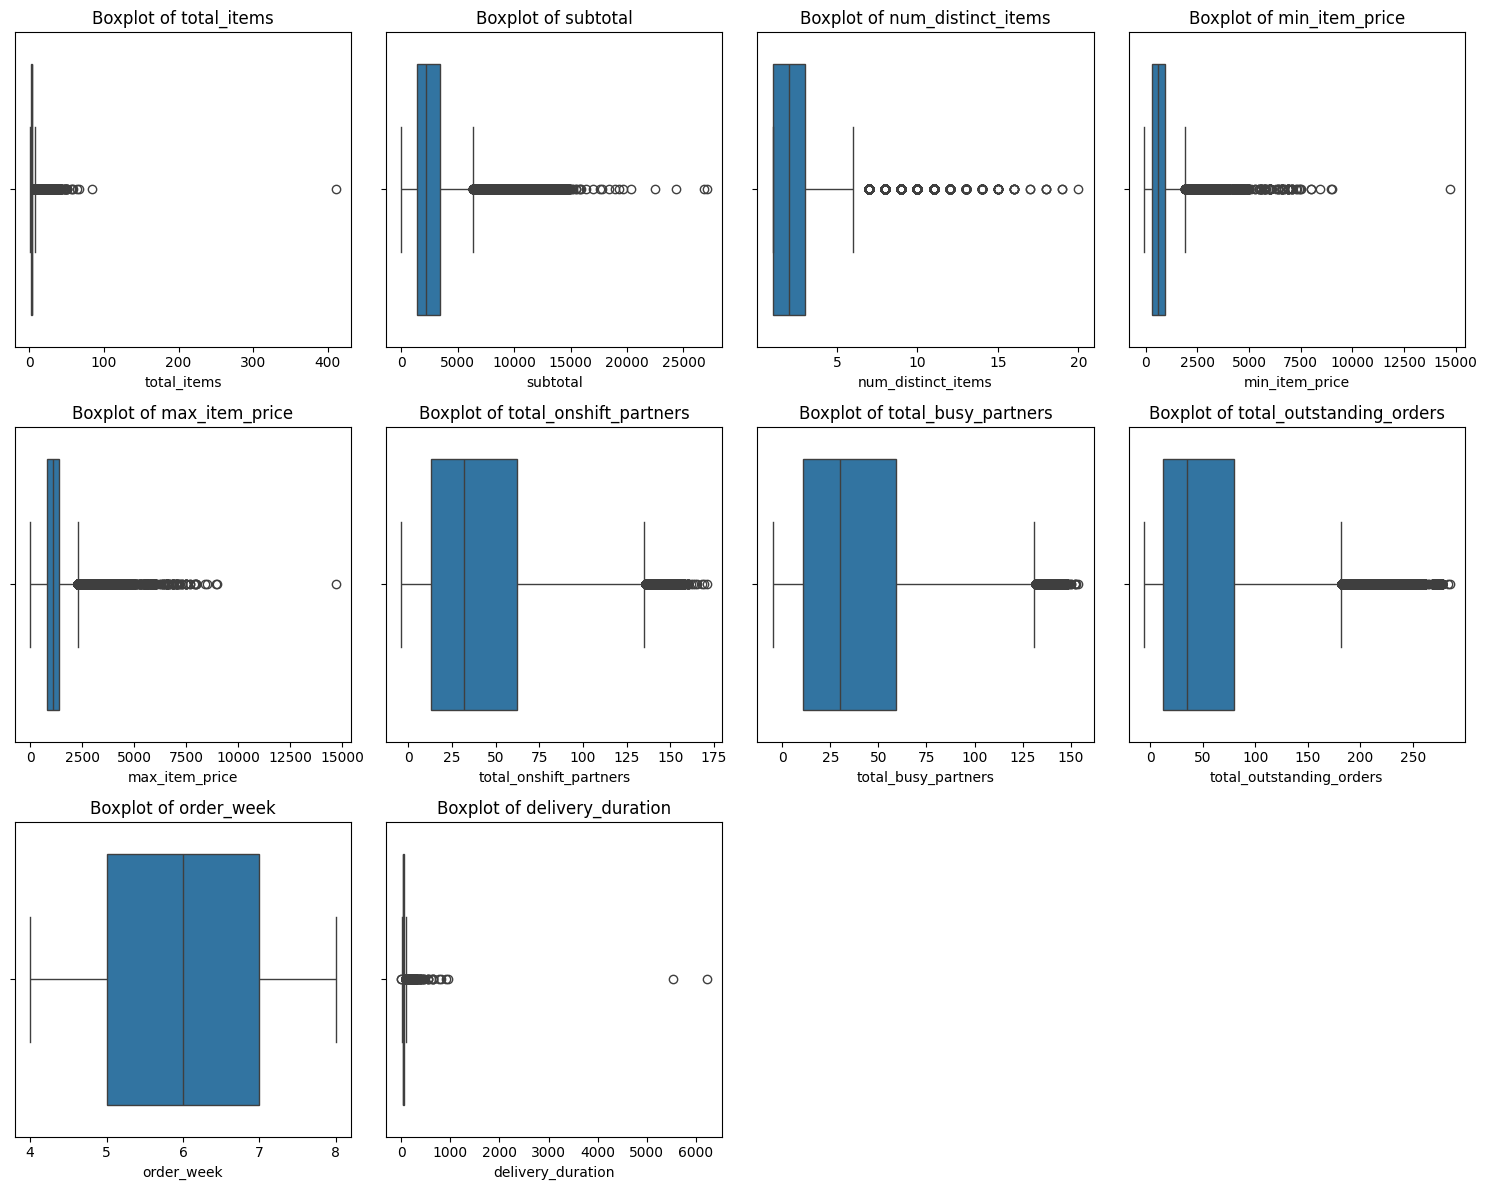

In [35]:

numeric_columns = porter_n.select_dtypes(include='number').columns
num_plots_per_row = 4
num_rows = (len(numeric_columns) + num_plots_per_row - 1) // num_plots_per_row  # calculate number of rows

plt.figure(figsize=(15, num_rows * 4))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_plots_per_row, i)
    sns.boxplot(data=porter_n, x=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


- **total_items :-** Highest outlires being around 400 items.
- **Subtotal :-** There are a few orders with extremely high subtotal, up to about 25,000.
- **min_item_price :-** Some orders have very low minimum item price, the higest outier bneig around 15,000.
- **max_item_price :-** A few orders have very high maximum item prices, with the higerst outlier being around 15,000.


#### ***--> Find Outliers using IQR(Interquartile Range)***

In [36]:
# Select only numeric columns for outlier analysis
numeric_cols = porter_n.select_dtypes(include=['float64', 'int64']).columns

# Calculate IQR and identify outliers for each numeric column
outliers = {}
for col in numeric_cols:
    # Calculate Q1, Q3, and IQR
    Q1 = porter_n[col].quantile(0.25)
    Q3 = porter_n[col].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Find outliers
    outliers[col] = porter_n[(porter_n[col] < lower_bound) | (porter_n[col] > upper_bound)][col]

# Display the outliers count for each numeric column
outliers_summary = {col: len(outliers[col]) for col in outliers}
outliers_summary


{'total_items': 9587,
 'subtotal': 9054,
 'num_distinct_items': 5919,
 'min_item_price': 4600,
 'max_item_price': 7729,
 'total_onshift_partners': 1859,
 'total_busy_partners': 718,
 'total_outstanding_orders': 6239,
 'delivery_duration': 6590}

#### ***--> Find Outliers using Z-score Method***

In [37]:
outlier_counts = {}
numeric_cols = porter_n.select_dtypes(include=['float64', 'int64']).columns
    
for col in numeric_cols:
    mean = porter_n[col].mean()
    std_dev = porter_n[col].std()        
        # Calculate Z-scores
    z_scores = (porter_n[col] - mean) / std_dev
    
    outlier_counts[col] = np.sum(np.abs(z_scores) > 3)

outlier_counts

{'total_items': np.int64(2561),
 'subtotal': np.int64(3789),
 'num_distinct_items': np.int64(3002),
 'min_item_price': np.int64(2763),
 'max_item_price': np.int64(3103),
 'total_onshift_partners': np.int64(595),
 'total_busy_partners': np.int64(393),
 'total_outstanding_orders': np.int64(1873),
 'delivery_duration': np.int64(756)}

#### **--> Remove Outlires from dataset**

   - Using IQR Method

In [38]:
def remove_outliers(data):
    # Copy the orignal data
    cleaned_data = data.copy()
    
    numeric_cols = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out rows that have outliers in this column
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
    
    return cleaned_data

porter_clean_iqr = remove_outliers(porter_n)

print(porter_n.shape)
porter_clean_iqr.shape

(197420, 21)


(157662, 21)

- Using Z-score method

In [39]:
def remove_outliers_zscore(data, threshold=3):
    cleaned_data = data.copy() 
    numeric_cols = cleaned_data.select_dtypes(include='number').columns
    
    for col in numeric_cols:
        mean = cleaned_data[col].mean()
        std_dev = cleaned_data[col].std()
        
        # Calculate Z-scores
        z_scores = (cleaned_data[col] - mean) / std_dev
        
        cleaned_data = cleaned_data[np.abs(z_scores) <= threshold]
    
    return cleaned_data

porter_clean_zscore = remove_outliers_zscore(porter_n)
print('Actual Given Data')
print(porter_n.shape,'\n')

print(' After Removing outliers Data')
print(porter_clean_zscore.shape)

Actual Given Data
(197420, 21) 

 After Removing outliers Data
(180360, 21)


### ***--> Check With Boxplot***

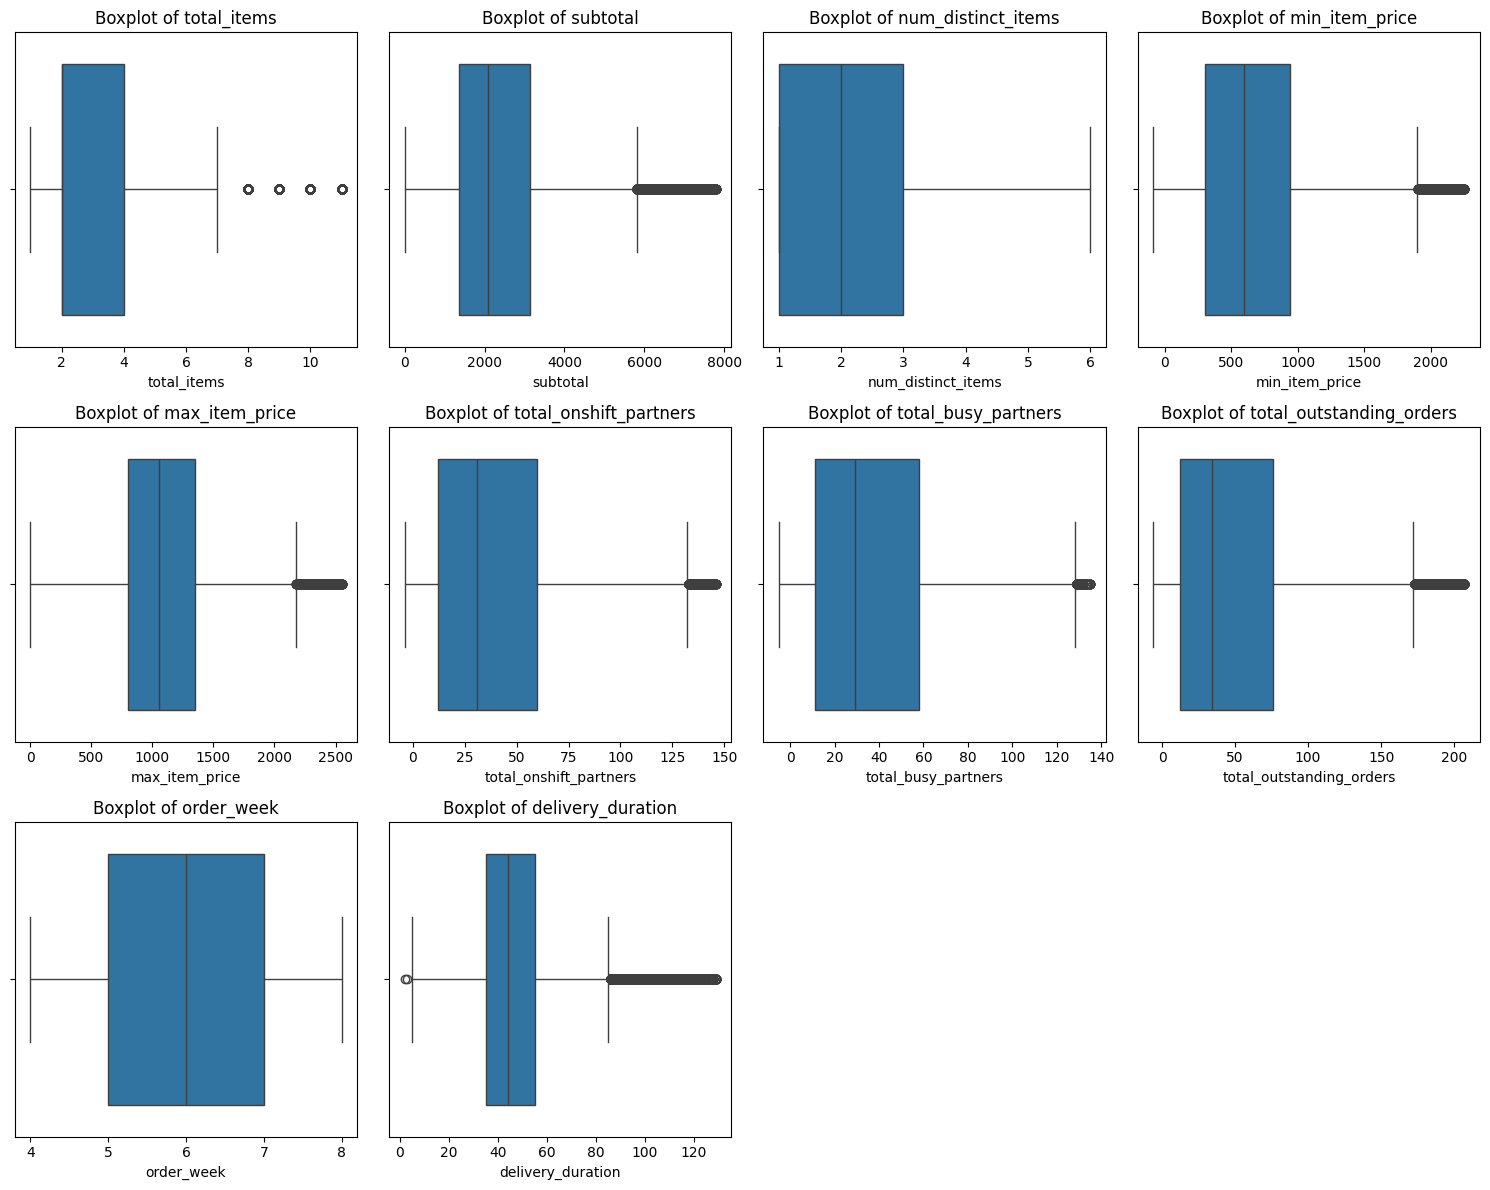

In [40]:

numeric_columns = porter_clean_zscore.select_dtypes(include='number').columns

num_plots_per_row = 4
num_rows = (len(numeric_columns) + num_plots_per_row - 1) // num_plots_per_row

plt.figure(figsize=(15, num_rows * 4))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_plots_per_row, i)
    sns.boxplot(data=porter_clean_zscore, x=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


#### **--> Distribution Of Continuous Variables**

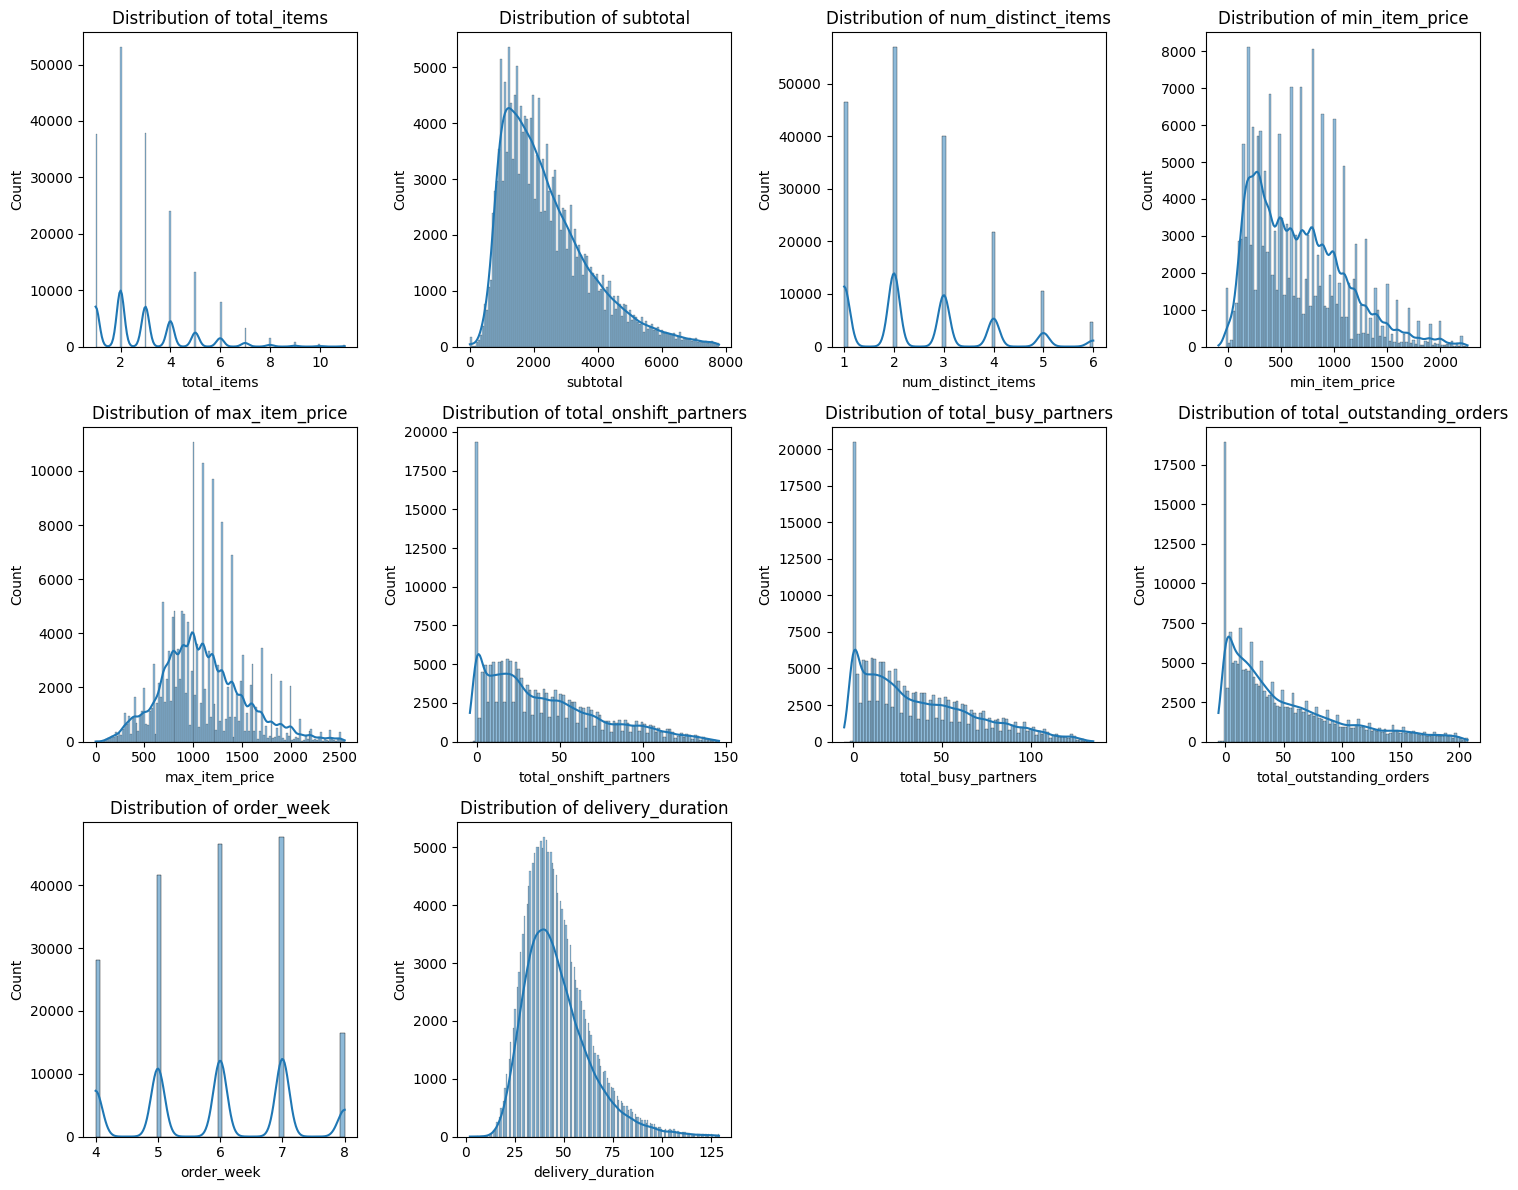

In [41]:

numeric_columns = porter_clean_zscore.select_dtypes(include='number').columns

num_plots_per_row = 4
num_rows = (len(numeric_columns) + num_plots_per_row - 1) // num_plots_per_row  

plt.figure(figsize=(15, num_rows * 4))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_plots_per_row, i)
    sns.histplot(data=porter_clean_zscore, x=column,kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

- ***Total Items:*** Most orders have fewer than 3 items, with a steep drop as the item count increases.
- ***Subtotal:*** The subtotal is mostly concentrated below 2000, with fewer high-value orders.
- ***Distinct Items:*** Many orders contain 1 or 2 distinct items, and very few have more than 4.
- ***Minimum Item Price:*** Item prices tend to be below 500, with a few high-cost items over 1000.
- ***Maximum Item Price:*** Prices for the most expensive items are often below 1000, with a gradual decrease as prices go higher.
- ***Onshift Partners:*** The number of available partners is mostly below 50, with fewer high counts.
- ***Busy Partners:*** Many partners are busy with 10 or fewer orders, with the frequency dropping as the number of busy partners increases.
- ***Outstanding Orders:*** There are usually fewer than 20 outstanding orders, with a decrease as the count increases.
- ***Order Week:*** Orders peak during specific weeks (e.g., weeks 5, 6, 7, and 8).
- ***Delivery Duration:*** Most deliveries take around 30-60 minutes, with few taking longer than 100 minutes.

### ***--> Analysis Data With charts***

##### ***Delivery Time Distribution***

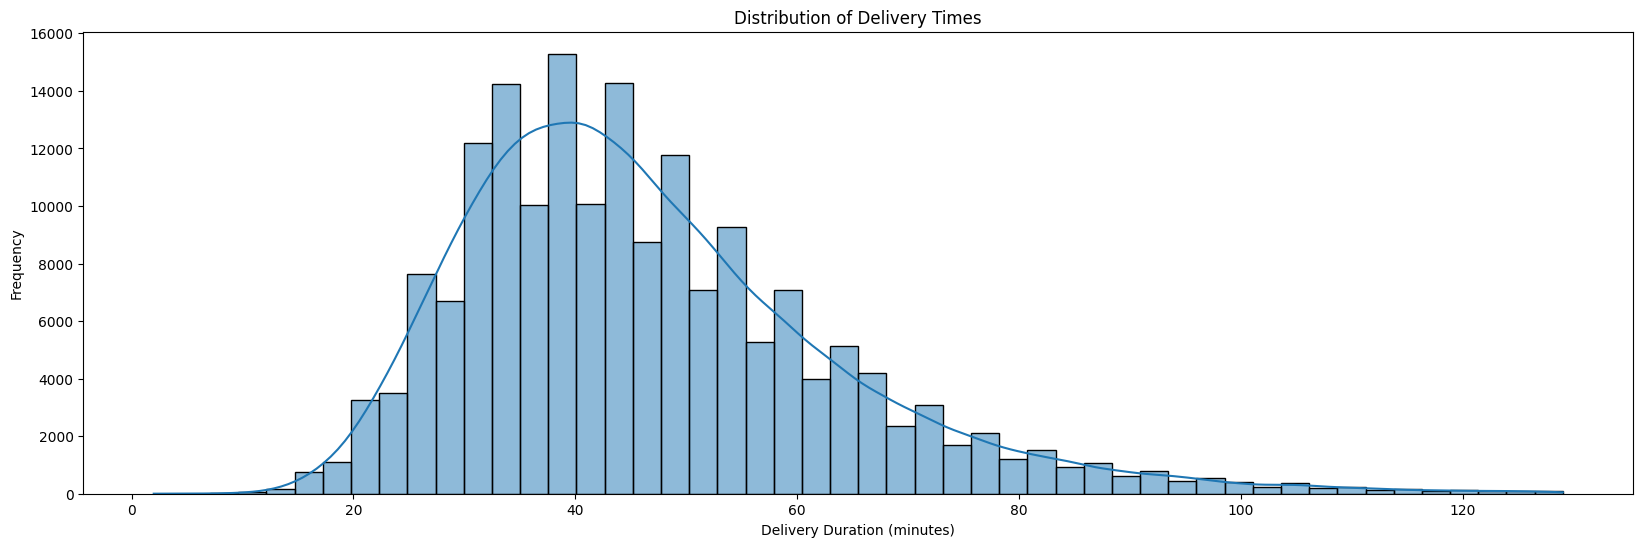

In [42]:
plt.figure(figsize=(20, 6))
sns.histplot(porter_clean_zscore['delivery_duration'], bins=50, kde=True)
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


* Most deliveries are completed within 30 to 50 minutes.
* The peak delivery time is around 40 minutes.
* Delivery times gradually decrease beyond 50 minutes, with very few deliveries taking longer than 100 minutes.

##### ***Delivery Duration by Protocol Type***

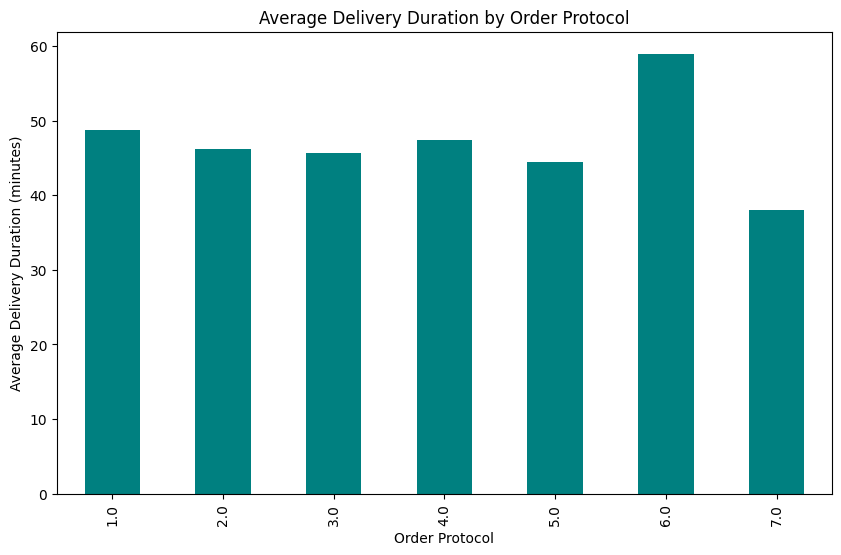

In [43]:
plt.figure(figsize=(10, 6))
protocol_avg_time = porter_clean_zscore.groupby('order_protocol')['delivery_duration'].mean()
protocol_avg_time.plot(kind='bar', color='teal')
plt.title('Average Delivery Duration by Order Protocol')
plt.xlabel('Order Protocol')
plt.ylabel('Average Delivery Duration (minutes)')
plt.show()


- Protocol 6 has the longest delivery time (~60 mins), while Protocol 7 is the shortest (~40 mins). Other protocols are similar, around 45-50 mins.

##### ***Delivery Time vs. Number of Items***

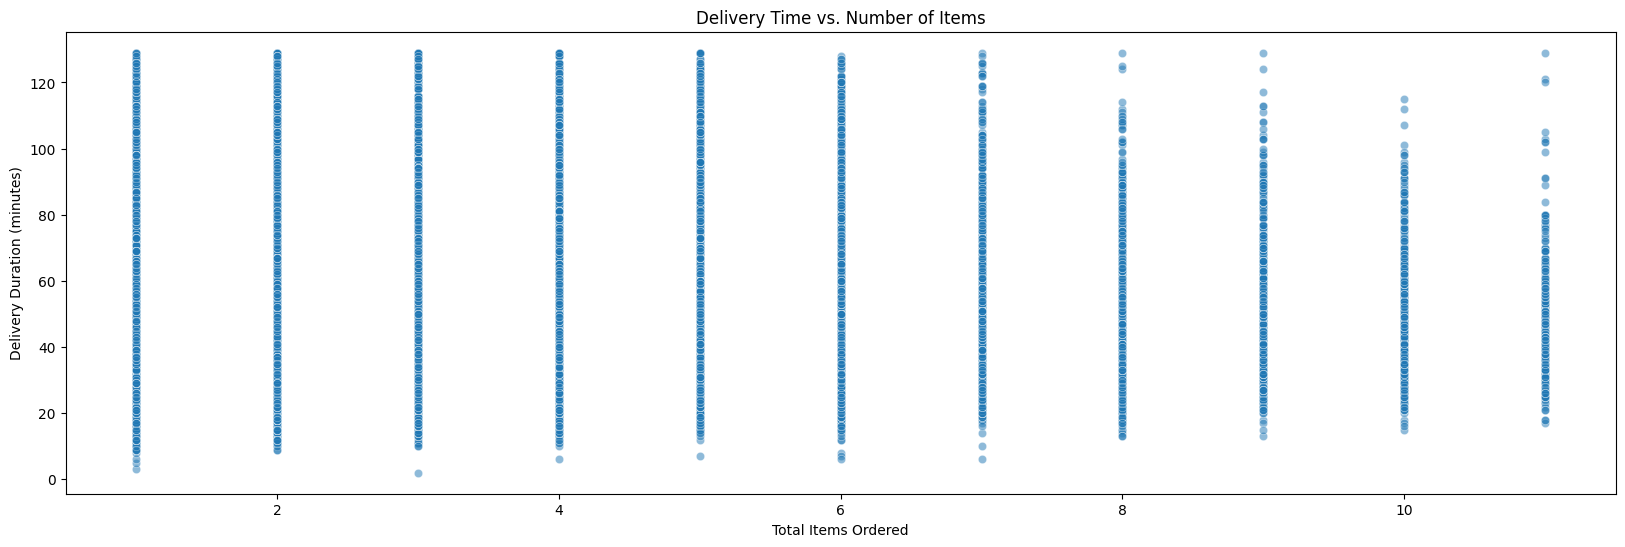

In [44]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=porter_clean_zscore, x='total_items', y='delivery_duration', alpha=0.5)
plt.title('Delivery Time vs. Number of Items')
plt.xlabel('Total Items Ordered')
plt.ylabel('Delivery Duration (minutes)')
plt.show()

- Delivery time varies widely across different item counts, but there’s no strong trend showing that more items increase delivery time significantly.

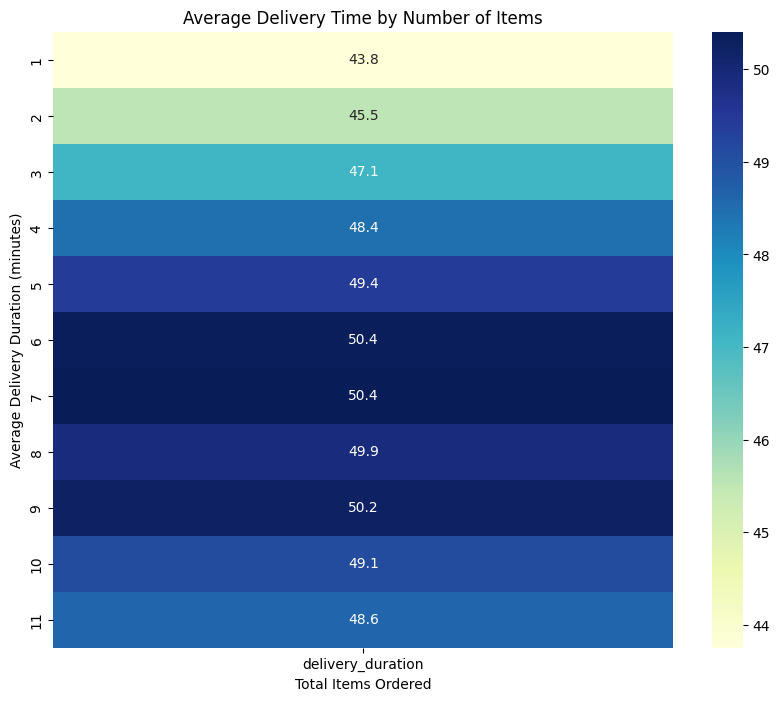

In [59]:
plt.figure(figsize=(10, 8))
heatmap_data = porter_clean_zscore.pivot_table(index='total_items', values='delivery_duration', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Average Delivery Time by Number of Items')
plt.xlabel('Total Items Ordered')
plt.ylabel('Average Delivery Duration (minutes)')
plt.show()

- Average delivery time increases slightly as the number of items rises, with 1 item averaging 43.8 minutes and peaking at 50.4 minutes for 6 and 7 items.

##### ***Delivery Time by Store Category***

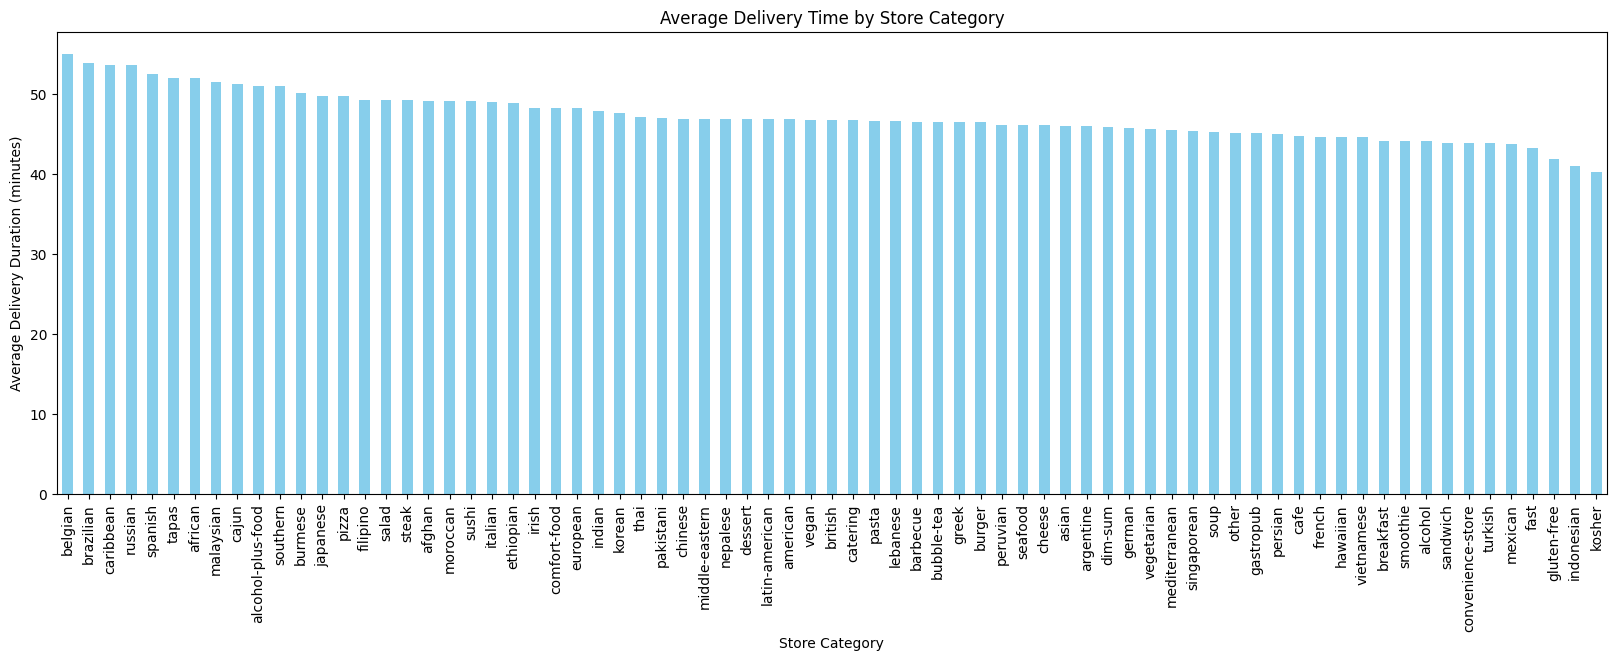

In [67]:
plt.figure(figsize=(20, 6))

porter_clean_zscore.groupby('store_primary_category')['delivery_duration'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')

plt.title('Average Delivery Time by Store Category')
plt.ylabel('Average Delivery Duration (minutes)')
plt.xlabel('Store Category')
plt.show()


- Belgian, Brazilian, and Caribbean stores have the highest average delivery times, around 50-55 minutes.
- Categories like Kosher, Indonesian, and Gluten-free have the lowest average delivery times, typically around 35 minutes or less.
- Store type affects how long customers expect deliveries to take.

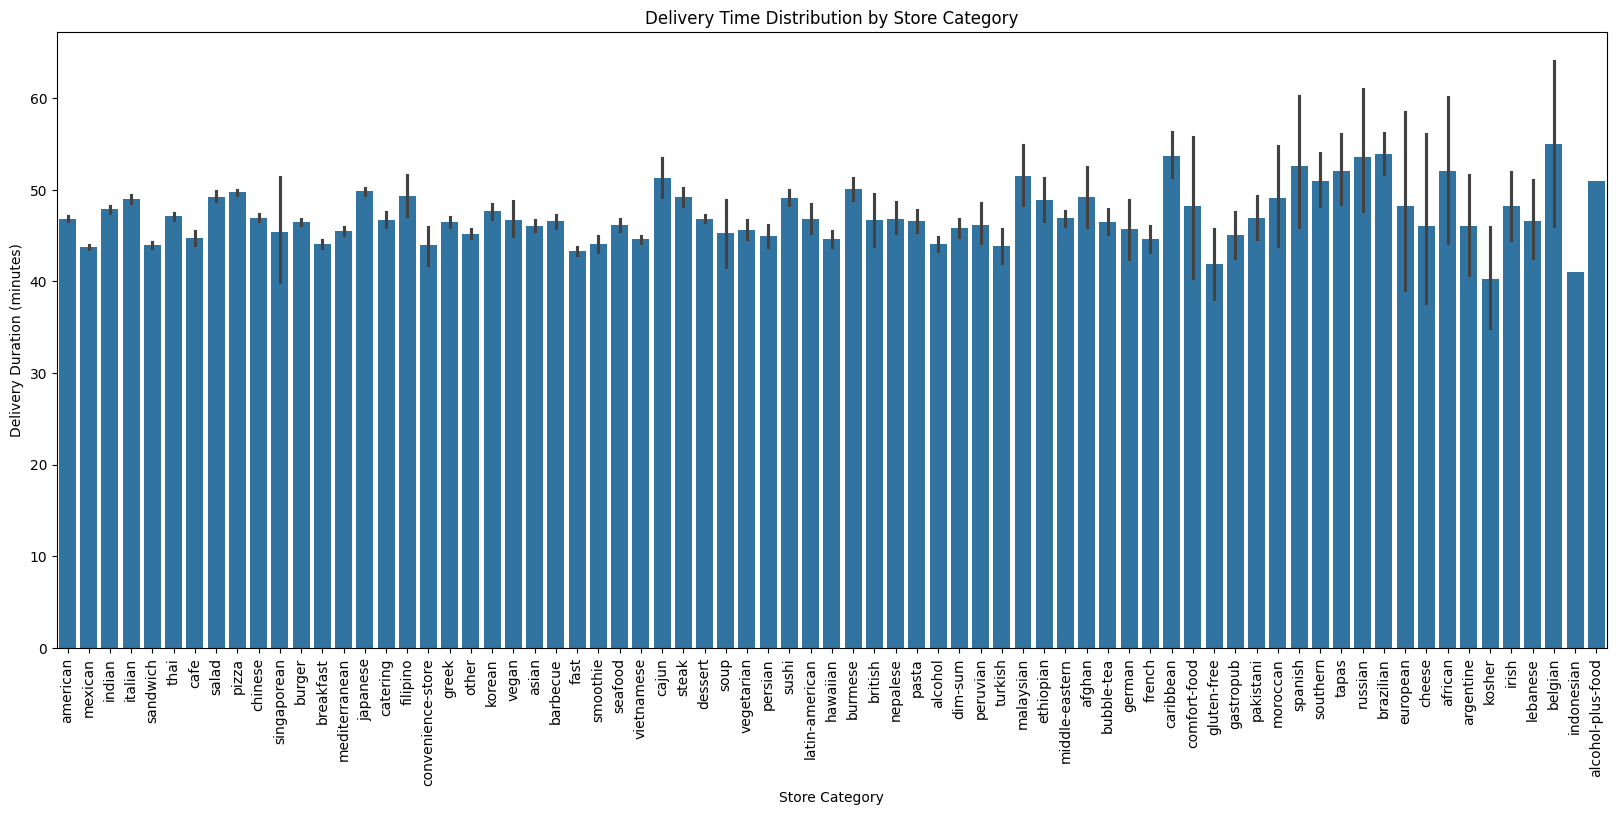

In [70]:
plt.figure(figsize=(20, 8))
sns.barplot(data=porter_clean_zscore, x='store_primary_category', y='delivery_duration')
plt.title('Delivery Time Distribution by Store Category')
plt.xlabel('Store Category')
plt.ylabel('Delivery Duration (minutes)')
plt.xticks(rotation=90)
plt.show()

- Some categories, like Belgian, Brazilian, and Caribbean, have a higher range of delivery times, often above 40 minutes, with a few instances reaching 120 minutes or more.
- Most store categories have median delivery times around 40-50 minutes, but the range and spread differ significantly.

##### ***Impact of Partner Availability on Delivery Time***

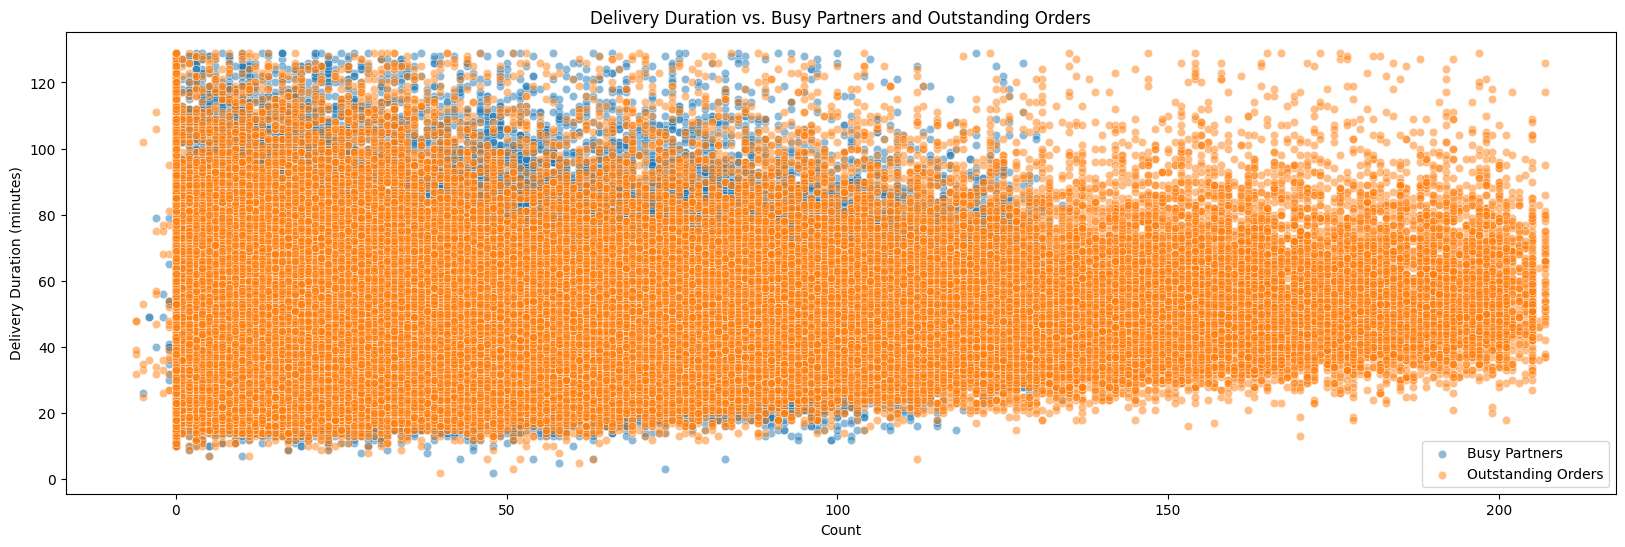

In [48]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='total_busy_partners', y='delivery_duration', data=porter_clean_zscore, alpha=0.5, label='Busy Partners')
sns.scatterplot(x='total_outstanding_orders', y='delivery_duration', data=porter_clean_zscore, alpha=0.5, label='Outstanding Orders')
plt.title('Delivery Duration vs. Busy Partners and Outstanding Orders')
plt.xlabel('Count')
plt.ylabel('Delivery Duration (minutes)')
plt.legend()
plt.show()


- More outstanding orders often lead to longer delivery times.
- Busy partners are less connected to the longest delivery times.
- High outstanding orders seem to have a bigger impact on delivery times than busy partners.

##### ***Impact of Min and Max Item Price on Delivery Duration***

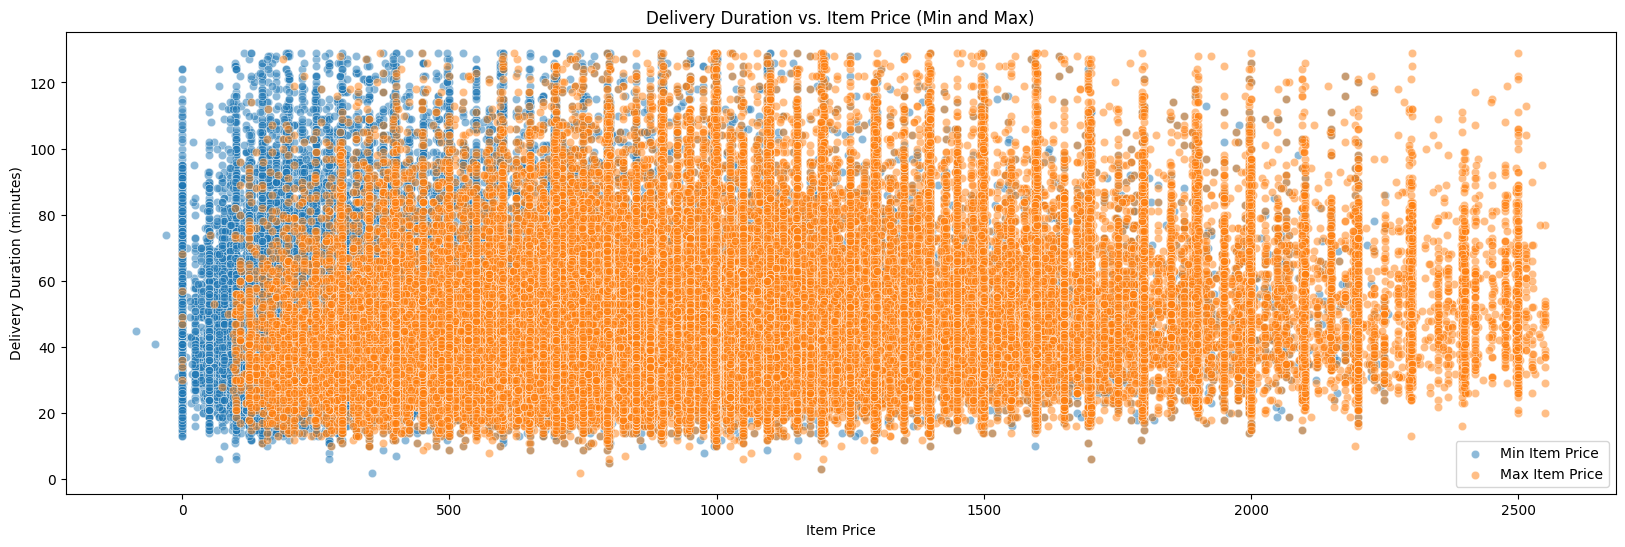

In [49]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='min_item_price', y='delivery_duration', data=porter_clean_zscore, alpha=0.5, label='Min Item Price')
sns.scatterplot(x='max_item_price', y='delivery_duration', data=porter_clean_zscore, alpha=0.5, label='Max Item Price')
plt.title('Delivery Duration vs. Item Price (Min and Max)')
plt.xlabel('Item Price')
plt.ylabel('Delivery Duration (minutes)')
plt.legend()
plt.show()


##### ***Impact of Busy and On-shift Partners***

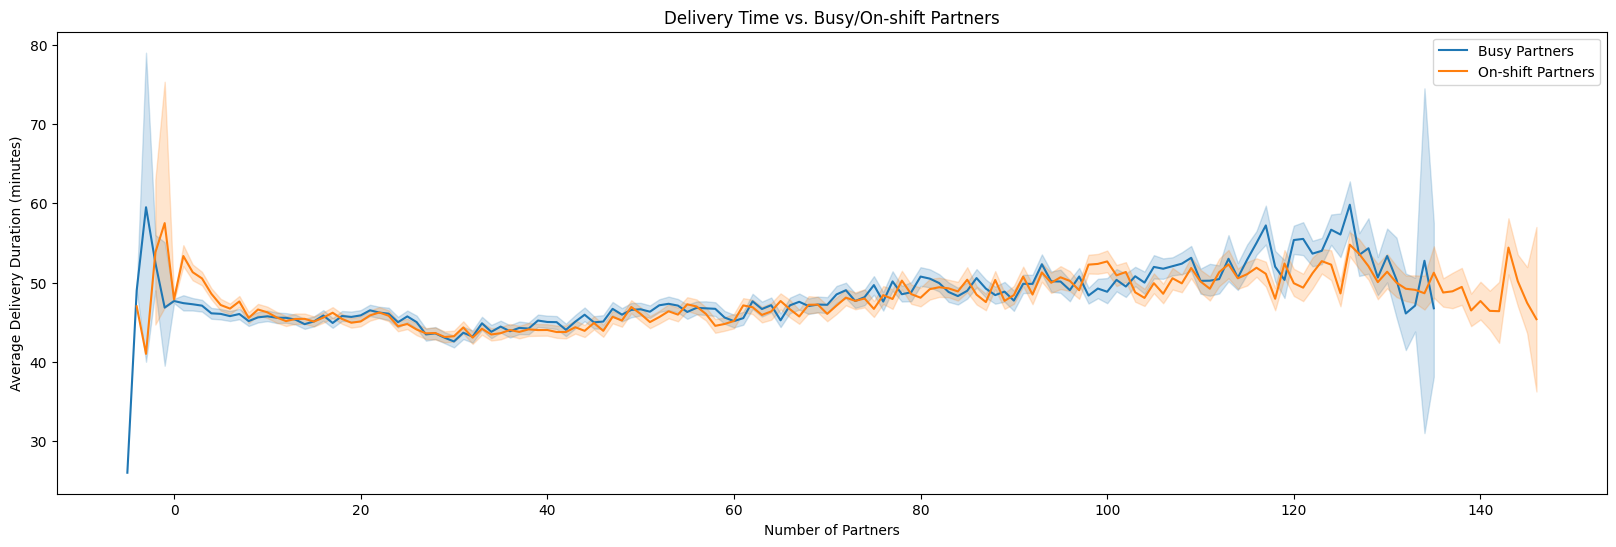

In [52]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=porter_clean_zscore, x='total_busy_partners', y='delivery_duration', label='Busy Partners')
sns.lineplot(data=porter_clean_zscore, x='total_onshift_partners', y='delivery_duration', label='On-shift Partners')
plt.title('Delivery Time vs. Busy/On-shift Partners')
plt.xlabel('Number of Partners')
plt.ylabel('Average Delivery Duration (minutes)')
plt.legend()
plt.show()

- When the number of partners is low, delivery times vary greatly.
- As the number of partners increases (above 20), delivery times become more stable, averaging around 40–50 minutes.
- Both busy and on-shift partner counts show similar trends in delivery duration, with only slight differences.

##### ***Delivery Time by Day of Week and Hour***

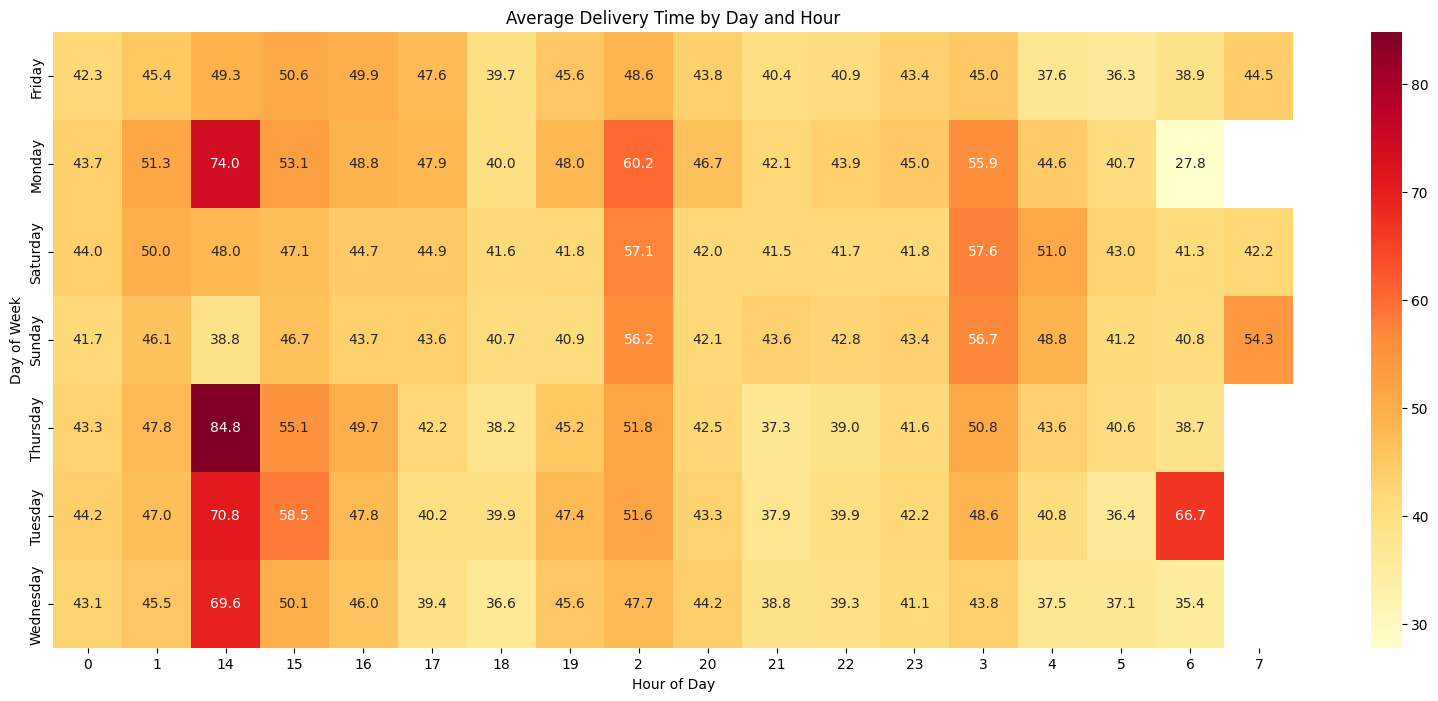

order_hour order_day_of_week          0          1         14         15  \
0                     Friday  42.254860  45.356820  49.333333  50.605634   
1                     Monday  43.748302  51.278124  74.000000  53.147541   
2                   Saturday  44.007775  50.010228  48.000000  47.060606   
3                     Sunday  41.657631  46.116314  38.750000  46.707965   
4                   Thursday  43.289074  47.791790  84.833333  55.103448   
5                    Tuesday  44.217391  46.985614  70.800000  58.535714   
6                  Wednesday  43.117561  45.514453  69.600000  50.058824   

order_hour         16         17         18         19          2         20  \
0           49.910959  47.618943  39.653313  45.612952  48.620909  43.783406   
1           48.803828  47.942257  40.026362  48.031694  60.164515  46.661000   
2           44.680590  44.932953  41.568765  41.823780  57.071442  42.043536   
3           43.702830  43.648611  40.710359  40.873457  56.230189  42.144640   
4           49.708171  42.179272  38.236453  45.233455  51.836177  42.487657   
5           47.799020  40.208824  39.922570  47.448355  51.602355  43.305191   
6           46.013100  39.365714  36.630515  45.592404  47.661263  44.181238   

order_hour         21         22         23          3          4          5  \
0           40.405494  40.926457  43.431373  45.008677  37.595538  36.284775   
1           42.101801  43.872361  44.980831  55.872785  44.578152  40.709602   
2           41.479811  41.655541  41.835779  57.575694  50.972371  42.952793   
3           43.587879  42.761402  43.413631  56.723364  48.752246  41.240157   
4           37.273618  38.965979  41.587177  50.819318  43.550725  40.557962   
5           37.921013  39.911890  42.243176  48.583254  40.826377  36.388175   
6           38.827096  39.317623  41.087336  43.785893  37.524246  37.133907   

order_hour          6          7  
0           38.909091  44.500000  
1           27.800000        NaN  
2           41.336000  42.166667  
3           40.788000  54.333333  
4           38.666667        NaN  
5           66.666667        NaN  
6           35.428571        NaN

In [65]:
time_heatmap = porter_clean_zscore.pivot_table(index='order_day_of_week', columns='order_hour', values='delivery_duration', aggfunc='mean')

plt.figure(figsize=(20, 8))
sns.heatmap(time_heatmap, cmap='YlOrRd', annot=True, fmt=".1f")
plt.title('Average Delivery Time by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()
time_heatmap.reset_index()

- Delivery times are shortest early in the morning (around 6-8 AM) across most days.
- Delivery times tend to increase during daytime hours and decrease overnight.
- **Thursday Afternoon:** Consistently has higher delivery times, making it a peak period for delays.

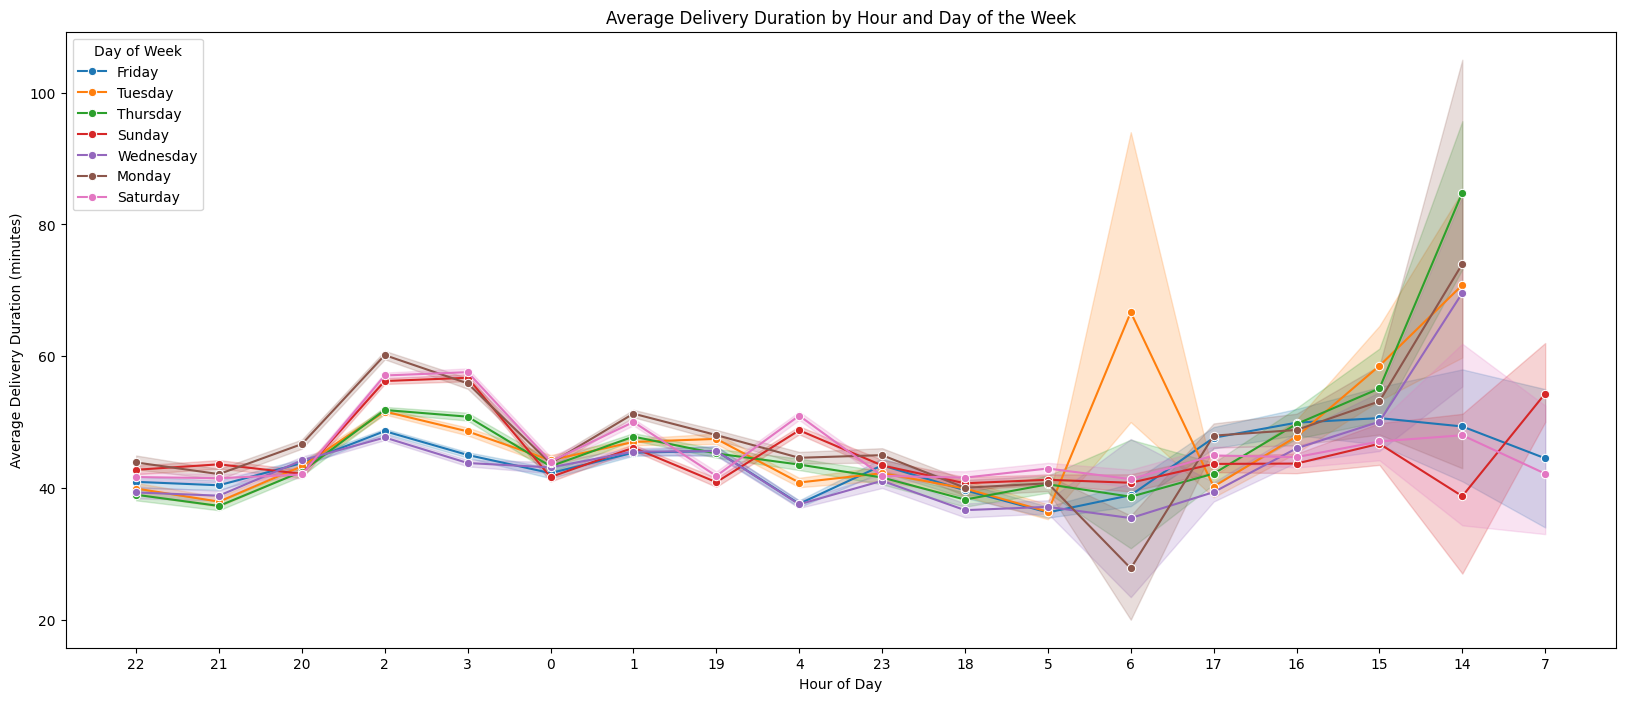

In [54]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=porter_clean_zscore, x='order_hour', y='delivery_duration', hue='order_day_of_week', marker='o')
plt.title('Average Delivery Duration by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delivery Duration (minutes)')
plt.legend(title='Day of Week',loc='upper left')
plt.show()


- The average delivery duration fluctuates, with a noticeable peak during the mid-afternoon (around 2 PM) and dips during late-night hours (2-5 AM).
- The chart shows that Tuesday and Thursday have more significant spikes

#### **--> Delivery Time by Busy vs. Idle Partners (Categorized)**

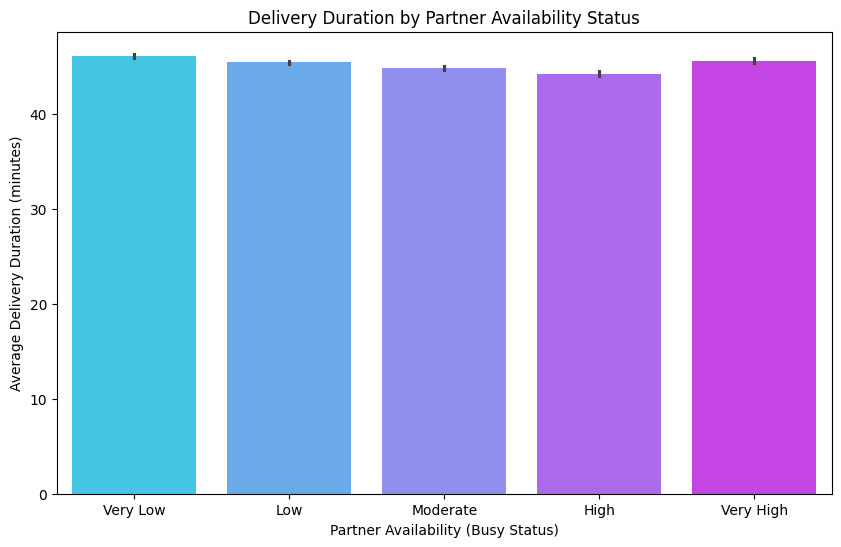

In [56]:
# Categorize busy partners
porter_clean_zscore['partner_status'] = pd.cut(porter_clean_zscore['total_busy_partners'], bins=[0, 10, 20, 30, 40, 50], labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

plt.figure(figsize=(10, 6))
sns.barplot(data=porter_clean_zscore, x='partner_status', y='delivery_duration', palette='cool')
plt.title('Delivery Duration by Partner Availability Status')
plt.xlabel('Partner Availability (Busy Status)')
plt.ylabel('Average Delivery Duration (minutes)')
plt.show()


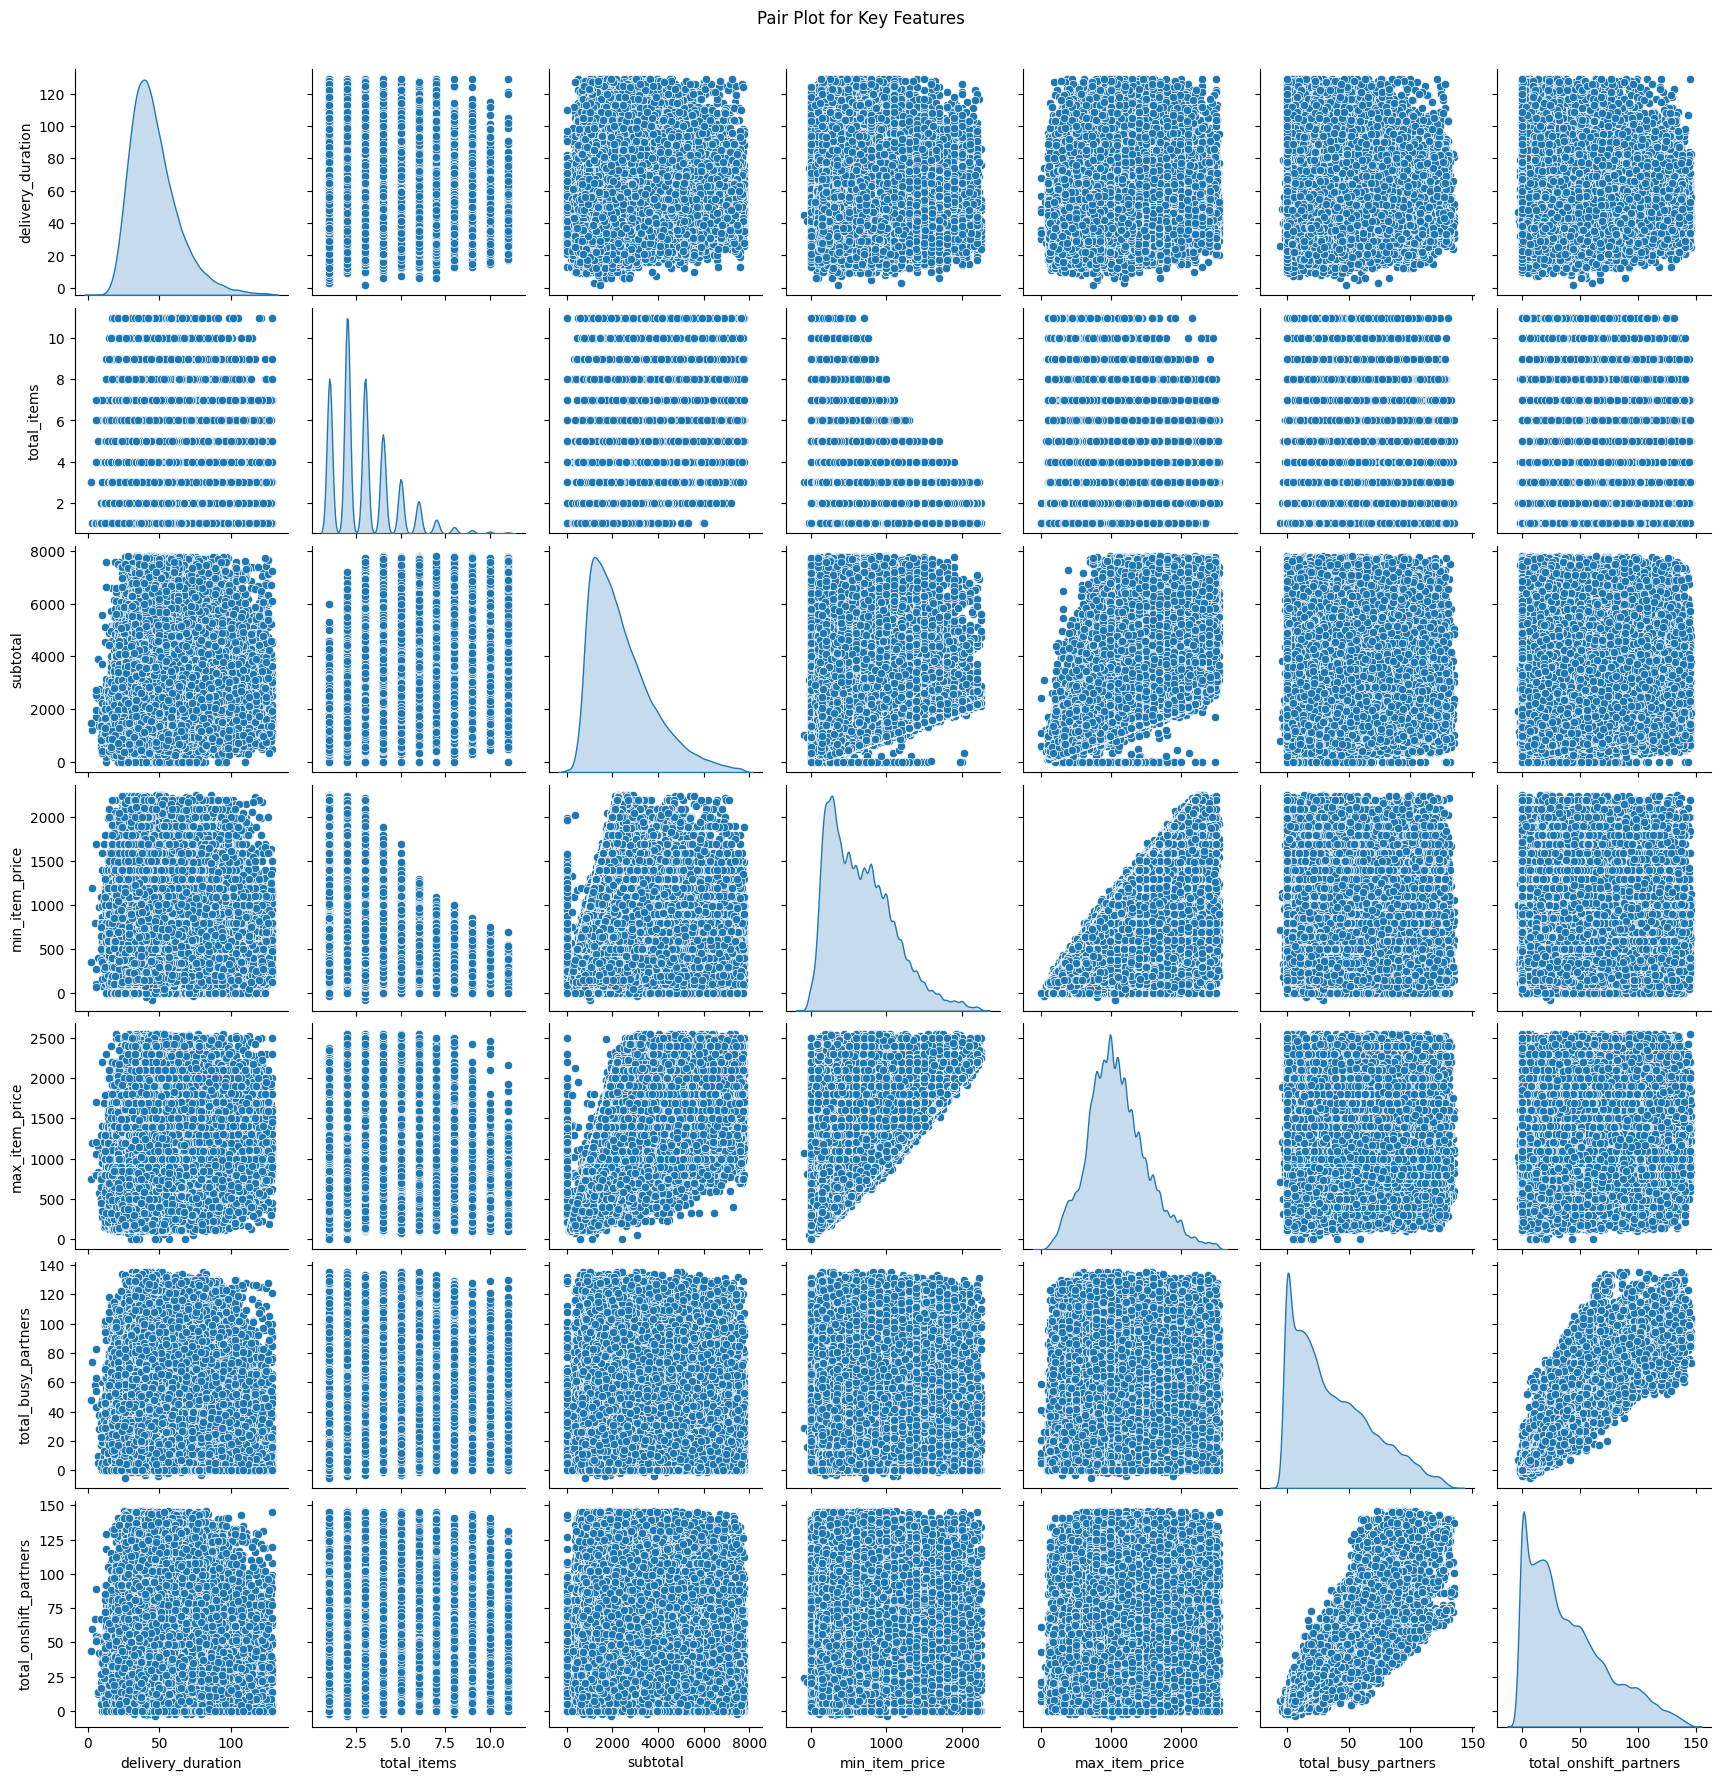

In [57]:
key_features = ['delivery_duration', 'total_items', 'subtotal', 'min_item_price', 'max_item_price', 'total_busy_partners', 'total_onshift_partners']
sns.pairplot(porter_clean_zscore[key_features], diag_kind='kde')
plt.suptitle('Pair Plot for Key Features', y=1.02)
plt.show()

- **Delivery Duration:** Skewed distribution with most values on the lower end, indicating short delivery times for most orders.
- **Total Busy Partners:** Has a wide spread, with a slight relationship with the subtotal, suggesting higher partner involvement for larger orders.

##### ***Correlation Heatmap***

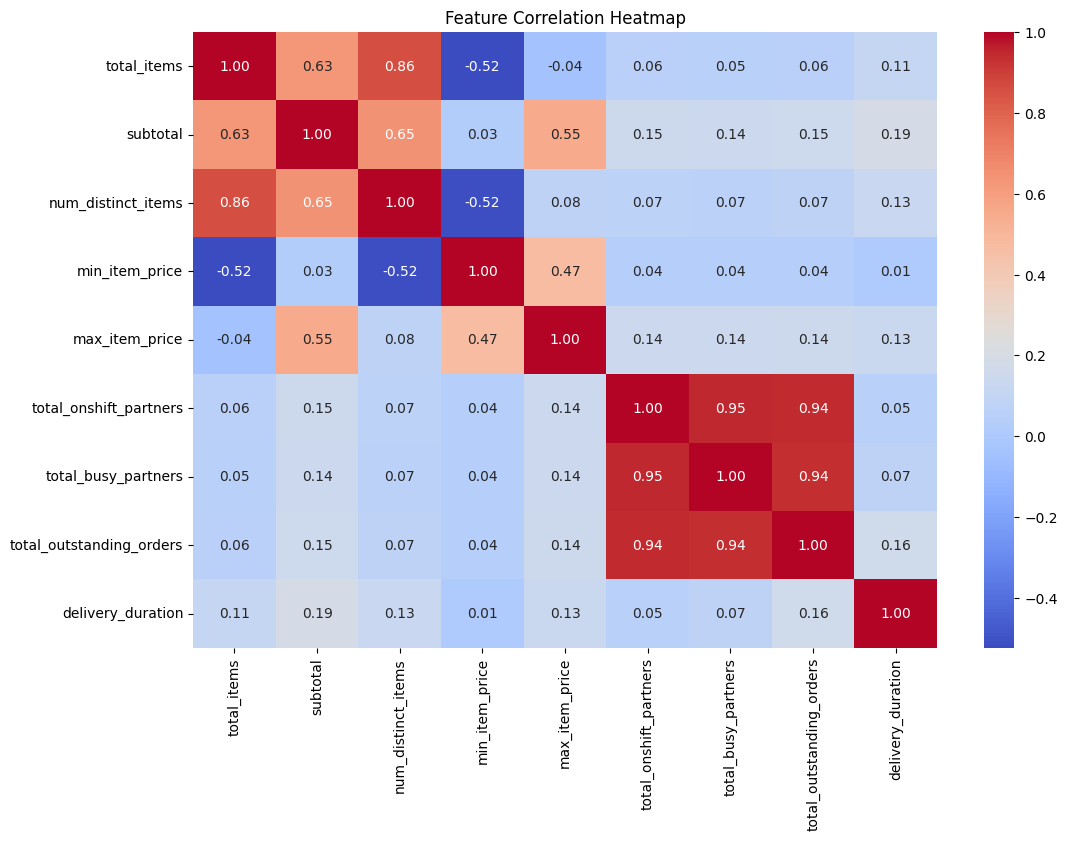

In [58]:
plt.figure(figsize=(12, 8))
correlation = porter_clean_zscore[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

#### ***`Strong Correlations:`***
- `total_items` and `num_distinct_items` (0.86): Orders with more items often have more distinct items.
- `total_onshift_partners`, `total_busy_partners`, and `total_outstanding_orders`: These three have high correlations (0.94–0.95), indicating they likely increase together in busy times.
#### ***`Low Correlations:`***
- `delivery_duration` has low correlations with most features, suggesting it might be influenced more by external factors, like traffic or time of day, than by order details.

## **`Summary of Key Insights`**

- `Order Details Affect Delivery:` Larger orders slightly increase delivery times. Orders placed using Protocol 6 take longer, while Protocol 7 is quicker.
- `Peak Times Cause Delays:` Delivery times are longer during the afternoon (around 2 PM) and on certain days like Tuesday and Thursday. Early mornings generally have faster deliveries.
- `Available Partners Help:` More delivery partners on duty help reduce delays, especially when there are a lot of outstanding orders.
- `Restaurant Type Impacts Time:` Some restaurant types, like Belgian and Brazilian, have longer delivery times, while others, like Kosher and Gluten-free, are faster.

## **`Recommendations`**

- `Adjust for Order Size:` Use total items and distinct items in the model to give accurate delivery estimates, especially for large orders.
- `Consider Time and Day:` Show longer delivery estimates during busy times (afternoons and certain days) and shorter times for early morning orders.
- `Boost Partner Availability:` Increase on-shift partners during peak times to prevent delays and manage higher demand smoothly.


# **`Conclusion`**

This analysis identifies key factors impacting Porter’s delivery times, such as order size, timing, and partner availability. By using these insights to refine delivery estimates, Porter can improve accuracy, reduce delays, and enhance customer satisfaction, supporting its leadership in India’s intra-city logistics.

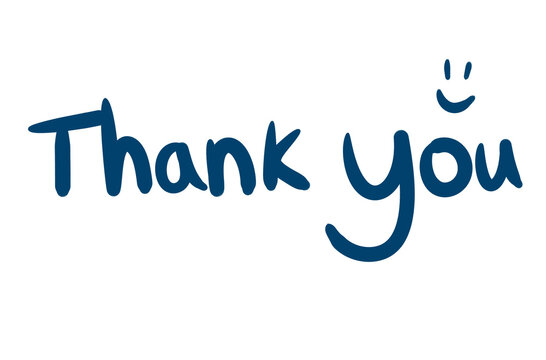